In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
file = open("data_rus_adasyn_risk2","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [3]:
X_train.head(2)

,menopaus_0,agegrp_2,agegrp_3,agegrp_4,agegrp_5,agegrp_6,agegrp_7,agegrp_8,agegrp_9,agegrp_10,...,race_5,hispanic_0,hispanic_1,bmi_3,bmi_4,agefirst_1,agefirst_2,nrelbc_0,nrelbc_2,lastmamm_1
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [4]:
X_test.head(2)

,menopaus_0,agegrp_2,agegrp_3,agegrp_4,agegrp_5,agegrp_6,agegrp_7,agegrp_8,agegrp_9,agegrp_10,...,race_5,hispanic_0,hispanic_1,bmi_3,bmi_4,agefirst_1,agefirst_2,nrelbc_0,nrelbc_2,lastmamm_1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [5]:
X_train.shape

(16577, 25)

In [6]:
X_test.shape

(59501, 25)

# Model Building on Cancer Data

## <span style="color:blue">Model 3 - Weighted Random Forest</span>

In [7]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score

def model_stats(X, y, y_pred, model):

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix ->")
    print(cm)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    print("Accuracy:",accuracy_score(y, y_pred))
    sensi=TP / float(TP+FN)
    speci=TN / float(TN+FP)
    # Let's see the sensitivity of our model
    print("Sensitivity:", sensi)

    # Let us calculate specificity
    print("Specificity:", speci)
    print("Average of Sensitivity and Specificity:", (sensi+speci)/2)

    # Let us calculate precision
    print("Precision",TP / float(TP+FP))
    print("MCC ", metrics.matthews_corrcoef(y, y_pred))
    print("F1 ", metrics.fbeta_score(y, y_pred, beta = 1))
    print("F2 ", metrics.fbeta_score(y, y_pred, beta = 2))
    print("F3 ", metrics.fbeta_score(y, y_pred, beta = 3))
    
    # Predicting probability for roc_auc
    pred_probs = model.predict_proba(X)[:,1]
    print("ROC-AUC : {:2.2}".format(roc_auc_score(y, pred_probs)))

    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs, drop_intermediate = False )
    auc_score = roc_auc_score(y, pred_probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    

### Default Hyperparameters

Let's first fit a random forest model with default hyperparameters.

In [8]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state = 100)

# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

 Let's check the evaluation metrics of our default model

In [10]:
# Making predictions
y_pred_train = rfc.predict(X_train) # For train data
y_pred_test = rfc.predict(X_test) # For test data

Confusion Matrix ->
[[6031 2555]
 [1600 6391]]
Accuracy: 0.7493515111298787
Sensitivity: 0.7997747465899137
Specificity: 0.702422548334498
Average of Sensitivity and Specificity: 0.7510986474622059
Precision 0.7143974960876369
MCC  0.5034602681360317
F1  0.7546791049182263
F2  0.7811048643363481
F3  0.7903295616150374
ROC-AUC : 0.84


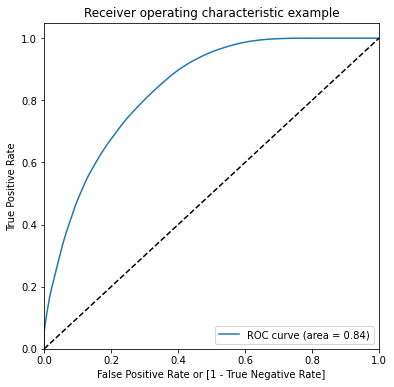

In [11]:
model_stats(X_train, y_train, y_pred_train, rfc)

Confusion Matrix ->
[[34908 23022]
 [  496  1075]]
Accuracy: 0.6047461387203577
Sensitivity: 0.6842775302355187
Specificity: 0.6025893319523563
Average of Sensitivity and Specificity: 0.6434334310939376
Precision 0.04461136241025854
MCC  0.09369417358669002
F1  0.0837618824996104
F2  0.1769197853921859
F3  0.2811486557171252
ROC-AUC : 0.7


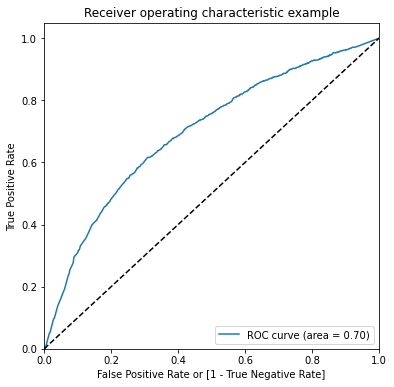

In [12]:
model_stats(X_test, y_test, y_pred_test, rfc)

### Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

### Grid Search to Find Optimal Hyperparameters

In [13]:
#We can now find the optimal hyperparameters using GridSearchCV.
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [14]:
# Create a cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [15]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100,150,200,250]
}

# Create a based model
rf = RandomForestClassifier(random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='balanced_accuracy',
                          cv = folds, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RandomForestClassifier(random_state=100), n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250]},
             scoring='balanced_accuracy', verbose=1)

In [16]:
# printing the optimal accuracy score and hyperparameters
print("best balanced_accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best balanced_accuracy 0.7008468129222629
RandomForestClassifier(random_state=100)


In [17]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion' : ['gini','entropy']
}

# Create a based model
rf = RandomForestClassifier(random_state = 100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced_accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


best balanced_accuracy 0.7012309903685662
RandomForestClassifier(criterion='entropy', random_state=100)


In [22]:
# Create the parameter grid based on the results of random search 
param_grid = {
    #'max_depth': [4,6,8],
    'min_samples_leaf': range(10,100,10),
    'min_samples_split': range(10,100,10)
}

# Create a model
rf = RandomForestClassifier(random_state = 100, criterion='entropy', max_depth=8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.6min finished


best accuracy 0.6766155752358891
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=60, random_state=100)


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,6,8]
}

# Create a model
rf = RandomForestClassifier(random_state = 100, criterion='entropy', min_samples_leaf=10, min_samples_split=60
                           max_depth=8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

In [23]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_samples': [0.2,0.4,0.6,0.8,1]
}

# Create a model
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=60, criterion='entropy', random_state=100)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = folds, scoring='balanced_accuracy', 
                           n_jobs = -1,verbose = 1)



# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.8s finished


best accuracy 0.6730669536074017
RandomForestClassifier(criterion='entropy', max_depth=8, max_samples=0.8,
                       min_samples_leaf=10, min_samples_split=60,
                       random_state=100)


### Fitting the final model with the best parameters obtained from grid search

In [24]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=60, random_state=100)


# fit
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10,
                       min_samples_split=60, random_state=100)

In [25]:
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

In [26]:
# feature_importance
importance = rf.feature_importances_

features=X_train.columns
# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).\
                     reset_index(drop=True)
feature_importance

,variables,importance_percentage
0,hispanic_0,20.887386
1,density_1,16.133833
2,race_2,9.365970
3,race_4,7.142780
4,hispanic_1,6.833308
5,race_5,6.114363
6,agefirst_2,4.743513
7,lastmamm_1,4.256962
8,agefirst_1,4.089990
9,bmi_4,3.352521


In [23]:
#y_pred_train = (rf.predict_proba(X_train)[:,1]>=0.47).astype(bool)

### Model evaluation on train and test data

Confusion Matrix ->
[[5910 2676]
 [2568 5423]]
Accuracy: 0.6836580804729444
Sensitivity: 0.6786384682768114
Specificity: 0.6883298392732355
Average of Sensitivity and Specificity: 0.6834841537750235
Precision 0.6695888381281639
MCC  0.3668277320425961
F1  0.6740832815413301
F2  0.6768090257843896
F3  0.6777225124347022
ROC-AUC : 0.76


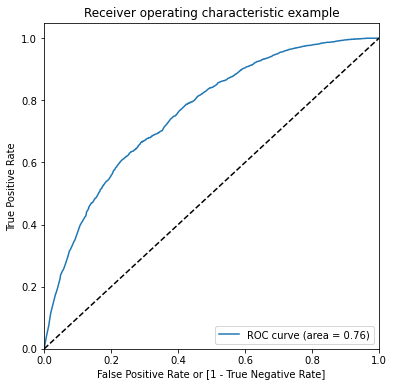

In [27]:
model_stats(X_train, y_train, y_pred_train, rf)

In [25]:
#y_pred_test = (rf.predict_proba(X_test)[:,1]>=0.47).astype(bool)

Confusion Matrix ->
[[36427 21503]
 [  535  1036]]
Accuracy: 0.6296196702576428
Sensitivity: 0.6594525779758116
Specificity: 0.6288106335232176
Average of Sensitivity and Specificity: 0.6441316057495146
Precision 0.04596477217267847
MCC  0.0952761115842062
F1  0.08593944421401908
F2  0.1797175866495507
F3  0.2824581492993075
ROC-AUC : 0.7


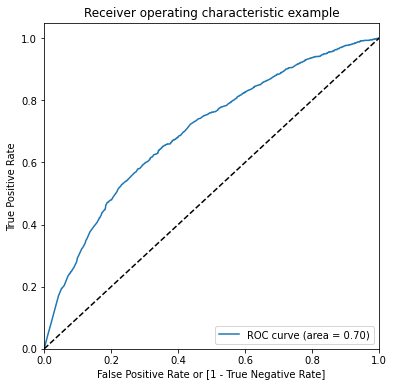

In [28]:
model_stats(X_test, y_test, y_pred_test, rf)